In [ ]:
import tensorflow as tf # for the entire model
import matplotlib.pyplot as plt # for plotting the confusion matrix
import numpy as np # for obvious reasons
from tensorflow.keras import layers # for making the model
from tensorflow.keras.models import Sequential # My CNN is a sequential model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For augmentation
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input # TO process the data into a format compatible with MobileNetV3
from sklearn.metrics import confusion_matrix # To compute the confusion matrix


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # Splitting the data into test and train batches
assert X_train.shape == (50000, 32, 32, 3) # Fixing the shape of test and train data
assert y_train.shape == (50000, 1)
assert X_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)


In [ ]:
X_train=X_train.astype("float32") # Converting the data into float for better accuracy from CNN 
X_test=X_test.astype("float32")
X_train_scaled=X_train/255.0 # Setting the range of the data as [0,1]
X_test_scaled=X_test/255.0

In [ ]:
datagen_no_aug = ImageDataGenerator() 
datagen_no_aug.fit(X_train)


In [ ]:
datagen_with_aug = ImageDataGenerator( # applying augmentation
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True
)
datagen_with_aug.fit(X_train)
X_test_aug= X_test_scaled.astype("float32")


In [ ]:
## cnn model without augmentation
cnn_model_no_aug = Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)), #architecture is TinyVGG
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_model_no_aug.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


/home/kaustubh/Desktop/gen ai induction task/image_classifier/lib64/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_no_aug = cnn_model_no_aug.fit(
    datagen_no_aug.flow(X_train_scaled, y_train, batch_size=64),
    validation_data=(X_test_aug, y_test),
    epochs=50,
    verbose=2,
    )
# Training my data. Not fully, tho. My laptop is equivalent to lava right now

Epoch 1/50


/home/kaustubh/Desktop/gen ai induction task/image_classifier/lib64/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 - 39s - 50ms/step - accuracy: 0.4981 - loss: 1.3967 - val_accuracy: 0.6408 - val_loss: 1.0189
Epoch 2/50
782/782 - 41s - 53ms/step - accuracy: 0.6775 - loss: 0.9169 - val_accuracy: 0.7018 - val_loss: 0.8588
Epoch 3/50
782/782 - 42s - 54ms/step - accuracy: 0.7373 - loss: 0.7488 - val_accuracy: 0.7307 - val_loss: 0.7664
Epoch 4/50
782/782 - 43s - 54ms/step - accuracy: 0.7798 - loss: 0.6323 - val_accuracy: 0.7445 - val_loss: 0.7373
Epoch 5/50
782/782 - 42s - 54ms/step - accuracy: 0.8100 - loss: 0.5372 - val_accuracy: 0.7453 - val_loss: 0.7581
Epoch 6/50
782/782 - 42s - 54ms/step - accuracy: 0.8377 - loss: 0.4564 - val_accuracy: 0.7589 - val_loss: 0.7320
Epoch 7/50
782/782 - 42s - 54ms/step - accuracy: 0.8654 - loss: 0.3779 - val_accuracy: 0.7516 - val_loss: 0.8055
Epoch 8/50
782/782 - 42s - 54ms/step - accuracy: 0.8938 - loss: 0.3016 - val_accuracy: 0.7534 - val_loss: 0.8503
Epoch 9/50
782/782 - 43s - 54ms/step - accuracy: 0.9115 - loss: 0.2465 - val_accuracy: 0.7437 - val_loss: 0

In [ ]:
## cnn model with augmentation
X_test_aug = X_test.copy() # made a copy so that I can standardize this for the augmentation to improve performance and normalize the data
datagen_with_aug.fit(X_train)
X_test_aug=datagen_with_aug.standardize(X_test_aug)
cnn_model_aug = Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_model_aug.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [ ]:
X_test_aug = X_test.copy()
datagen_with_aug.fit(X_train)
X_test_aug=datagen_with_aug.standardize(X_test_aug)
history_aug = cnn_model_aug.fit( # training the data.
    datagen_with_aug.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test_aug, y_test),
    epochs=50,
    verbose=2
)
# stopped early because my laptop is slowly becoming a new sun

Epoch 1/50
782/782 - 47s - 61ms/step - accuracy: 0.4683 - loss: 1.4682 - val_accuracy: 0.5601 - val_loss: 1.2222
Epoch 2/50
782/782 - 47s - 60ms/step - accuracy: 0.6062 - loss: 1.1080 - val_accuracy: 0.6769 - val_loss: 0.9091
Epoch 3/50
782/782 - 47s - 60ms/step - accuracy: 0.6603 - loss: 0.9603 - val_accuracy: 0.7064 - val_loss: 0.8332
Epoch 4/50
782/782 - 47s - 60ms/step - accuracy: 0.6867 - loss: 0.8897 - val_accuracy: 0.7197 - val_loss: 0.8250
Epoch 5/50
782/782 - 47s - 60ms/step - accuracy: 0.7073 - loss: 0.8313 - val_accuracy: 0.7397 - val_loss: 0.7642
Epoch 6/50
782/782 - 47s - 60ms/step - accuracy: 0.7229 - loss: 0.7927 - val_accuracy: 0.7410 - val_loss: 0.7582
Epoch 7/50
782/782 - 47s - 60ms/step - accuracy: 0.7355 - loss: 0.7587 - val_accuracy: 0.7300 - val_loss: 0.8117
Epoch 8/50
782/782 - 47s - 60ms/step - accuracy: 0.7438 - loss: 0.7281 - val_accuracy: 0.7409 - val_loss: 0.7718
Epoch 9/50
782/782 - 47s - 60ms/step - accuracy: 0.7525 - loss: 0.7055 - val_accuracy: 0.7403 - 

In [ ]:
## transfer learning model
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
base_model=tf.keras.applications.MobileNetV3Large( # using mobilenet because it is the only one which doesn't kebabs my laptop
    include_top=False,
    weights="imagenet",
    input_shape=(96,96,3) # This is the standard input shape for MobileNetV3.
)
base_model.trainable=True
for layer in base_model.layers[:-30]: 
    layer.trainable=False # freezing the last 30 layers for faster computing 

/home/kaustubh/Desktop/gen ai induction task/image_classifier/lib64/python3.13/site-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [19]:
transfer_learning_model_no_aug = Sequential([
    layers.Resizing(96, 96),  # Resize the images to match the model's input
    base_model,
    layers.GlobalAveragePooling2D(), # Reduces the feature maps to a single vector
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5), # A common regularization technique to prevent overfitting
    layers.Dense(10, activation="softmax") # The final classification layer
])
datagen_transfer_no_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
transfer_learning_model_no_aug.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_mobilenet_no_aug = transfer_learning_model_no_aug.fit(
    datagen_transfer_no_aug.flow(X_train, y_train, batch_size=64),
    validation_data=datagen_transfer_no_aug.flow(X_test, y_test, batch_size=64),
    epochs=30,
    verbose=2, 
)
# Stopped early so that my Sun Laptop doesn't go supernova

Epoch 1/30
782/782 - 140s - 179ms/step - accuracy: 0.8307 - loss: 0.5185 - val_accuracy: 0.8418 - val_loss: 0.6766
Epoch 2/30
782/782 - 135s - 173ms/step - accuracy: 0.9057 - loss: 0.2819 - val_accuracy: 0.8775 - val_loss: 0.4747
Epoch 3/30
782/782 - 135s - 173ms/step - accuracy: 0.9351 - loss: 0.1940 - val_accuracy: 0.8804 - val_loss: 0.5775
Epoch 4/30
782/782 - 135s - 173ms/step - accuracy: 0.9528 - loss: 0.1418 - val_accuracy: 0.8913 - val_loss: 0.4760
Epoch 5/30
782/782 - 135s - 173ms/step - accuracy: 0.9646 - loss: 0.1060 - val_accuracy: 0.8802 - val_loss: 0.6004
Epoch 6/30
782/782 - 135s - 172ms/step - accuracy: 0.9722 - loss: 0.0838 - val_accuracy: 0.8825 - val_loss: 0.6226
Epoch 7/30
782/782 - 135s - 172ms/step - accuracy: 0.9779 - loss: 0.0666 - val_accuracy: 0.8785 - val_loss: 0.9602
Epoch 8/30
782/782 - 135s - 173ms/step - accuracy: 0.9793 - loss: 0.0649 - val_accuracy: 0.8898 - val_loss: 0.6151
Epoch 9/30
782/782 - 134s - 172ms/step - accuracy: 0.9830 - loss: 0.0543 - val_a

KeyboardInterrupt: 

In [21]:
transfer_learning_model_with_aug=Sequential([
    layers.Resizing(96, 96),  # Resize the images to match the model's input
    base_model,
    layers.GlobalAveragePooling2D(), # Reduces the feature maps to a single vector
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5), # A common regularization technique to prevent overfitting
    layers.Dense(10, activation="softmax") # The final classification layer
])
datagen_transfer_with_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True
    
)
transfer_learning_model_with_aug.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history_mobilenet_with_aug = transfer_learning_model_with_aug.fit(
    datagen_transfer_with_aug.flow(X_train, y_train, batch_size=64),
    validation_data=datagen_transfer_no_aug.flow(X_test, y_test, batch_size=64),
    epochs=30,
    verbose=2, 
)
# At this point, stopped the process cuz I was really starting to think that my laptop started sucking things in

Epoch 1/30


/home/kaustubh/Desktop/gen ai induction task/image_classifier/lib64/python3.13/site-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/home/kaustubh/Desktop/gen ai induction task/image_classifier/lib64/python3.13/site-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


782/782 - 131s - 167ms/step - accuracy: 0.8656 - loss: 0.4283 - val_accuracy: 0.8984 - val_loss: 0.3340
Epoch 2/30
782/782 - 122s - 156ms/step - accuracy: 0.8993 - loss: 0.3025 - val_accuracy: 0.9042 - val_loss: 0.3332
Epoch 3/30
782/782 - 122s - 157ms/step - accuracy: 0.9093 - loss: 0.2697 - val_accuracy: 0.9109 - val_loss: 0.3016
Epoch 4/30
782/782 - 122s - 156ms/step - accuracy: 0.9184 - loss: 0.2412 - val_accuracy: 0.9063 - val_loss: 0.3299
Epoch 5/30
782/782 - 122s - 156ms/step - accuracy: 0.9257 - loss: 0.2224 - val_accuracy: 0.9086 - val_loss: 0.3294
Epoch 6/30


KeyboardInterrupt: 

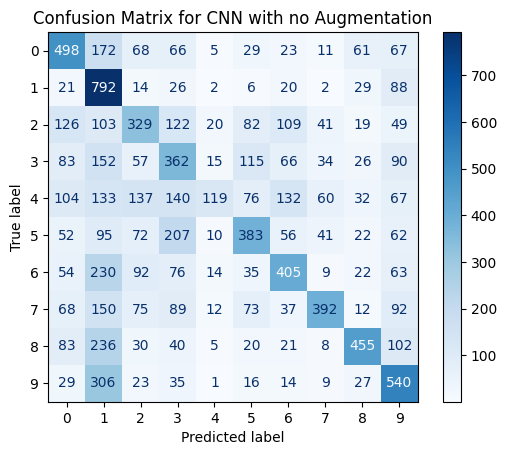

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true=y_test.flatten() # convert multi dimension array into a 1D array
y_pred_cnn_no_aug=np.argmax(cnn_model_no_aug.predict(X_test_aug, verbose=0),axis=1) # predicting and taking the highest probability
cm_cnn_no_aug=confusion_matrix(y_true=y_true,y_pred=y_pred_cnn_no_aug) # ccomputing the confusion matrix
disp_cnn_no_aug=ConfusionMatrixDisplay(confusion_matrix=cm_cnn_no_aug) # using this tool to display the confusion matrix
disp_cnn_no_aug.plot(cmap=plt.cm.Blues,values_format="d") # plotting the confusion matrix
plt.title("Confusion Matrix for CNN with no Augmentation")
plt.show() 

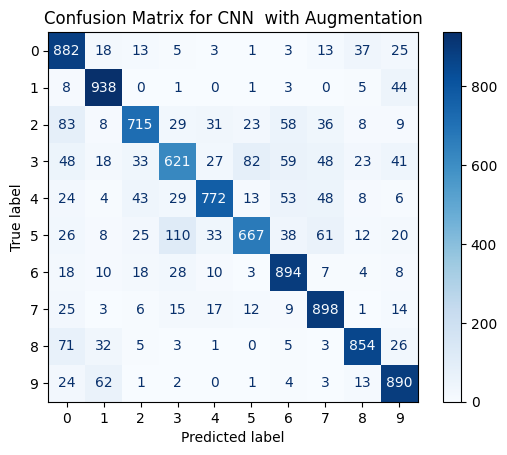

In [24]:
y_pred_cnn_with_aug=np.argmax(cnn_model_aug.predict(X_test_aug, verbose=0),axis=1)
cm_cnn_with_aug=confusion_matrix(y_true=y_true,y_pred=y_pred_cnn_with_aug)
disp_cnn_with_aug=ConfusionMatrixDisplay(confusion_matrix=cm_cnn_with_aug)
disp_cnn_with_aug.plot(cmap=plt.cm.Blues,values_format="d")
plt.title("Confusion Matrix for CNN  with Augmentation")
plt.show()

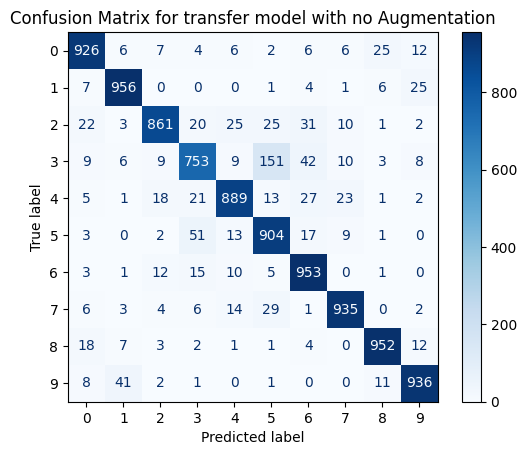

In [25]:
y_pred_mobilenet_no_aug=np.argmax(transfer_learning_model_no_aug.predict(X_test, verbose=0),axis=1)
cm_mobilenet_no_aug=confusion_matrix(y_true=y_true,y_pred=y_pred_mobilenet_no_aug)
disp_mobilenet_no_aug=ConfusionMatrixDisplay(confusion_matrix=cm_mobilenet_no_aug)
disp_mobilenet_no_aug.plot(cmap=plt.cm.Blues,values_format="d")
plt.title("Confusion Matrix for transfer model with no Augmentation")
plt.show()

In [ ]:
y_pred_mobilenet_with_aug=np.argmax(transfer_learning_model_with_aug.predict(X_test, verbose=0, batch_size=32),axis=1)
cm_mobilenet_with_aug=confusion_matrix(y_true=y_true,y_pred=y_pred_mobilenet_with_aug)
disp_mobilenet_with_aug=ConfusionMatrixDisplay(confusion_matrix=cm_mobilenet_with_aug)
disp_mobilenet_no_aug.plot(cmap=plt.cm.Blues,values_format="d")
plt.title("Confusion Matrix for transfer model with no Augmentation")
plt.show()